In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [4]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC

In [37]:
def PolynomialSVC(degree=2,C=1.):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("linearSVC",LinearSVC(C=C)),
    ])

In [7]:
from sklearn.datasets import make_moons

In [9]:
moons = make_moons(noise=.1)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearSVC',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [17]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3] - axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


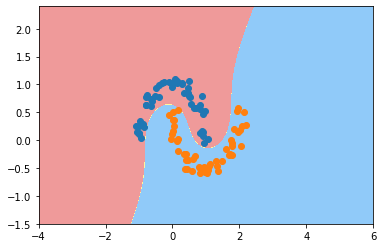

In [54]:
X = moons[0]
y = moons[1]
poly = PolynomialSVC(degree=3,C=1e0)
poly.fit(X,y)

plot_decision_boundary(poly,(-4,6,-1.5,2.4))
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.axis((-4,6,-1.5,2.4))
plt.show()

In [2]:
X.shape

NameError: name 'X' is not defined